In [21]:
import os
from dotenv import load_dotenv
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
load_dotenv()
dataset_dir = os.getenv("DATASET_DIR")
# print(dataset_dir)
# print(dataset_dir + "KAGGLE/DATASET-balanced.csv")

data = pd.read_csv(dataset_dir + "/KAGGLE/DATASET-balanced.csv")

In [11]:
print("Positive count: " + str(sum(data['LABEL'] == 'REAL')))
print("Negative count: " + str(sum(data['LABEL'] == 'FAKE')))

Positive count: 5889
Negative count: 5889


Dataset is balanced

In [ ]:
data["LABEL"] = (data["LABEL"] == 'REAL').astype(int)

In [23]:
data.head()

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,LABEL
0,0.338055,0.027948,2842.948867,4322.916759,6570.586186,0.041050,-462.169586,90.311272,19.073769,24.046888,...,-6.686564,0.902086,-7.251551,-1.198342,4.747403,-4.986279,0.953935,-5.013138,-6.779060,0
1,0.443766,0.037838,2336.129597,3445.777044,3764.949874,0.047730,-409.413422,120.348808,-7.161531,5.114784,...,-2.131157,-6.876417,-1.359395,0.326401,-5.420016,-2.109968,-1.757634,-9.537907,-8.494421,0
2,0.302528,0.056578,2692.988386,2861.133180,4716.610271,0.080342,-318.996033,120.490273,-24.625771,23.891073,...,-5.853725,-3.724773,-6.627182,-5.117002,-6.072106,-0.994653,-1.617120,-3.922354,-7.033001,0
3,0.319933,0.031504,2241.665382,3503.766175,3798.641521,0.047180,-404.636749,136.320908,2.308172,-3.907071,...,-1.898315,-2.046493,-7.176277,-3.293508,4.209121,0.121835,-5.407063,-3.654926,-3.274857,0
4,0.420055,0.016158,2526.069123,3102.659519,5025.077899,0.051905,-410.497925,152.731400,-18.266771,51.993462,...,-1.952340,0.810868,6.238493,6.555839,7.535542,2.849219,2.616843,-1.793357,-5.060998,0


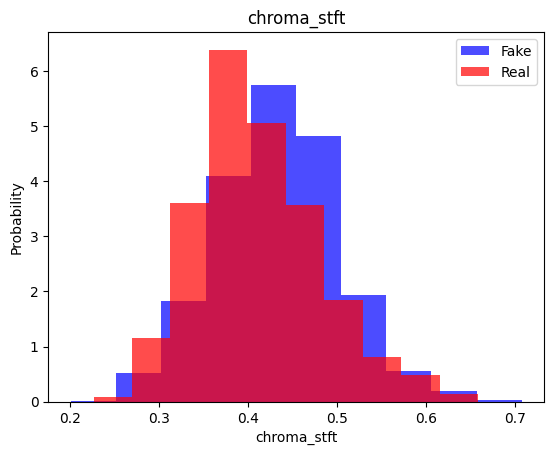

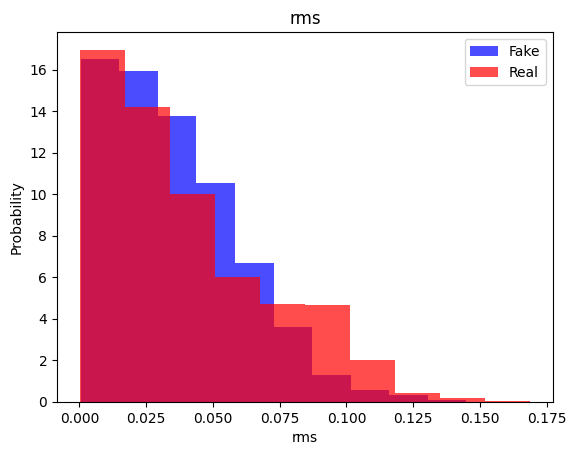

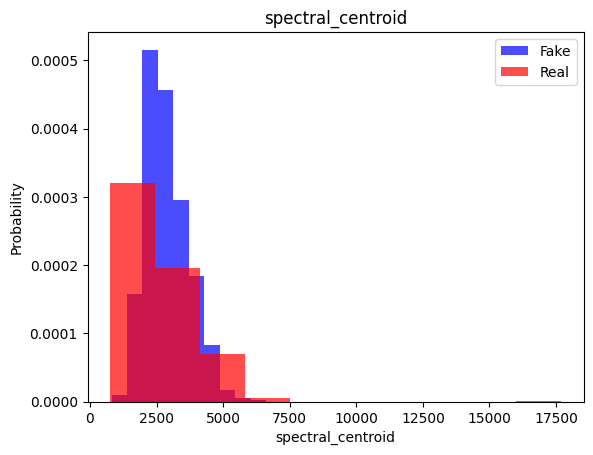

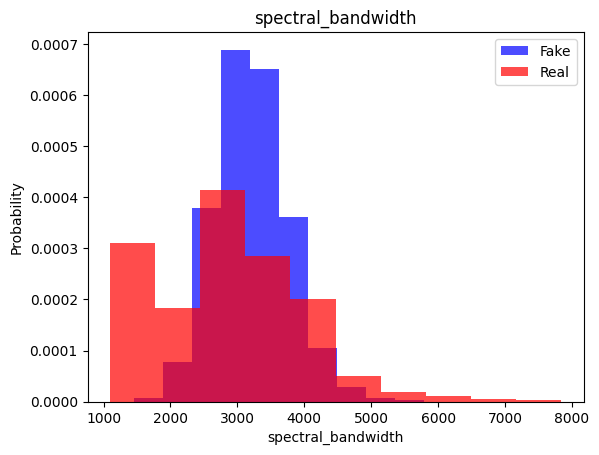

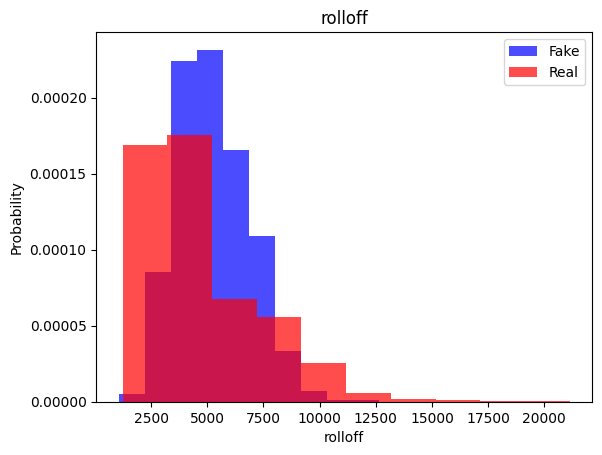

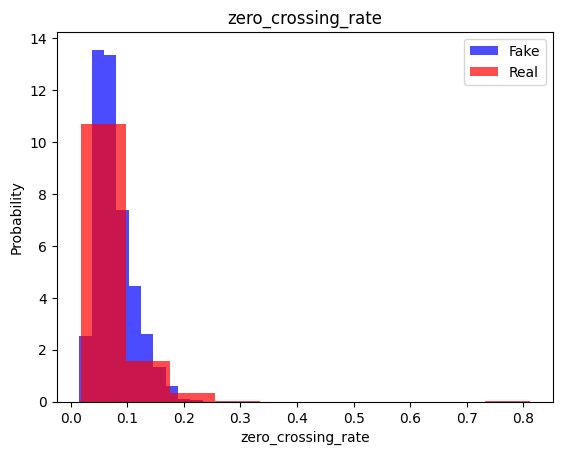

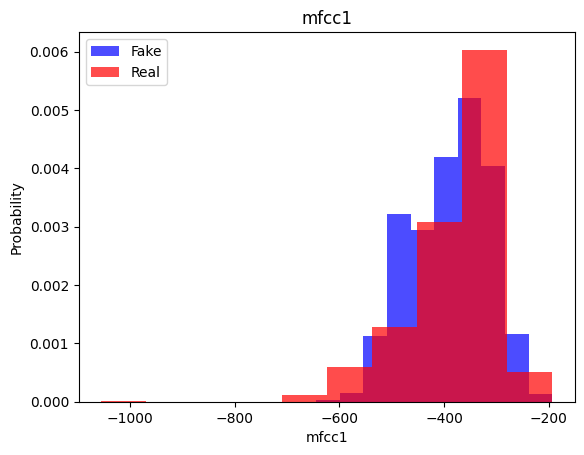

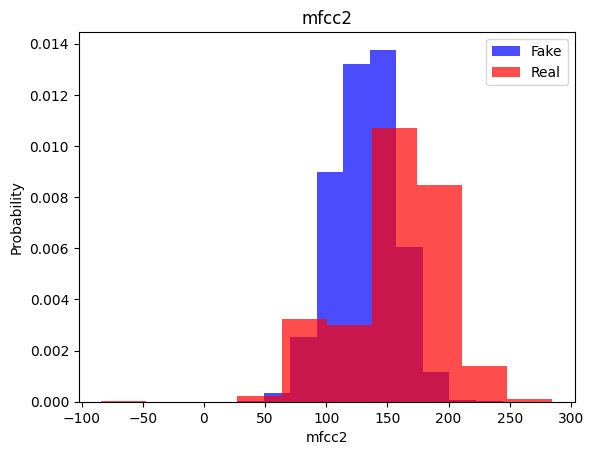

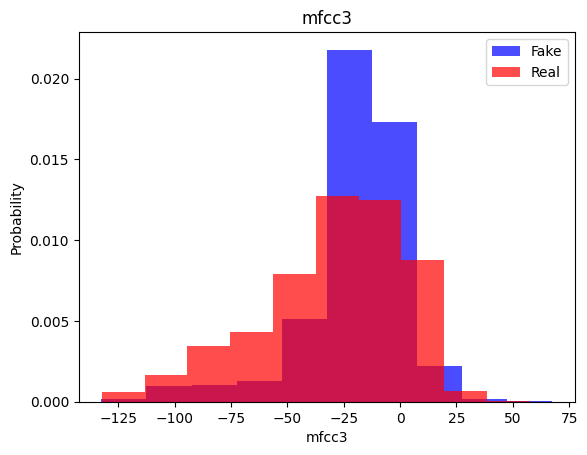

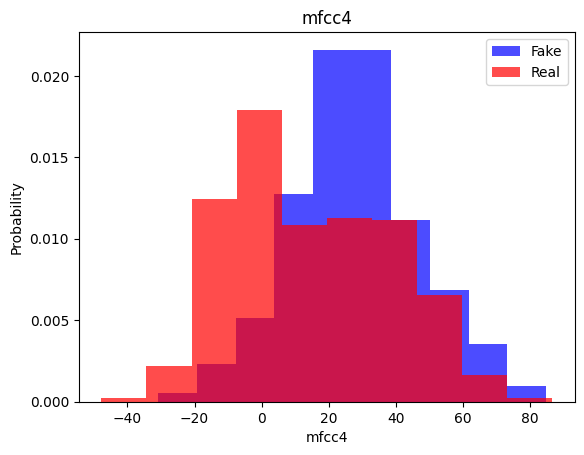

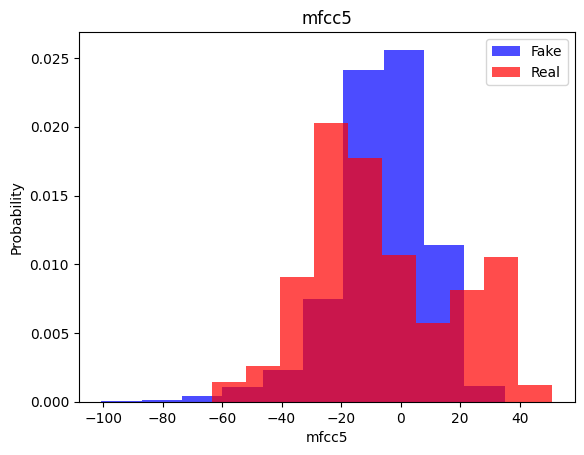

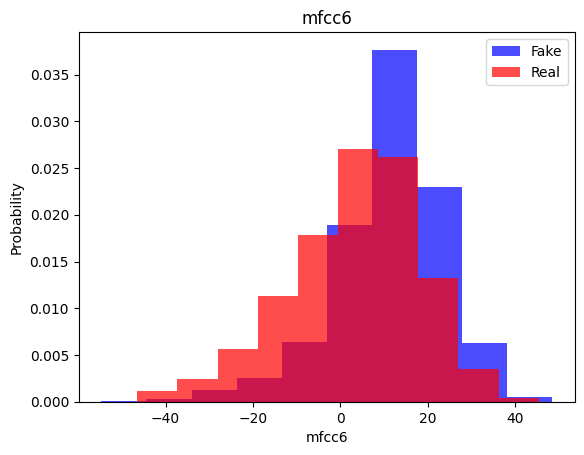

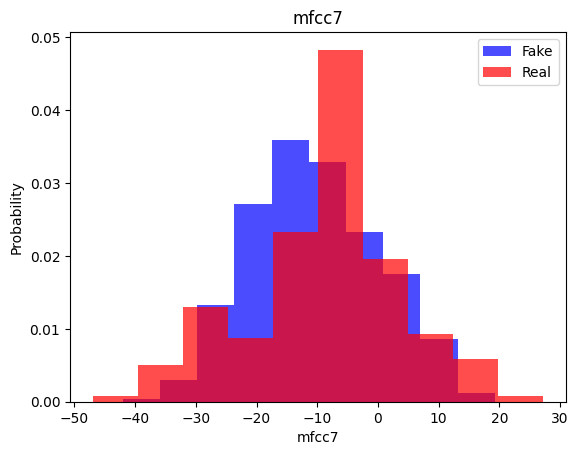

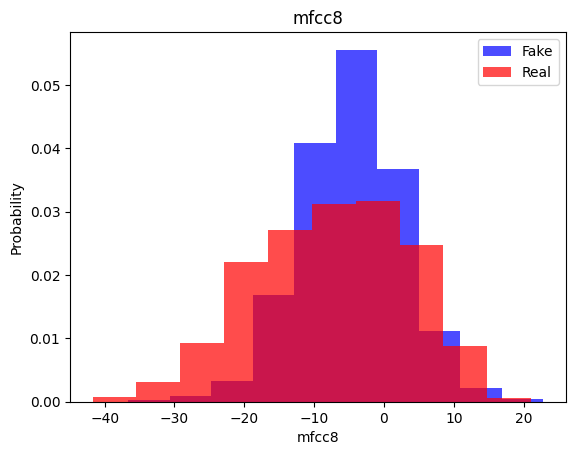

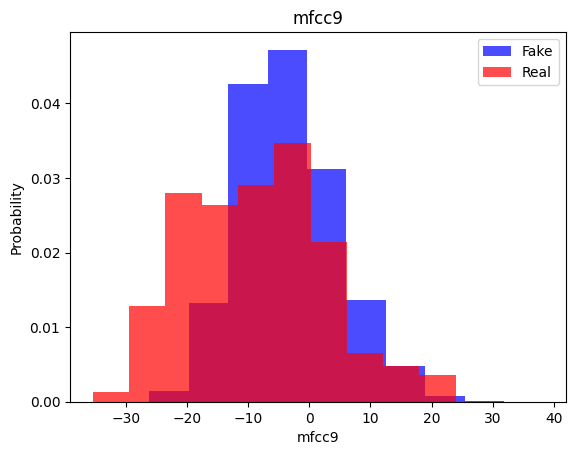

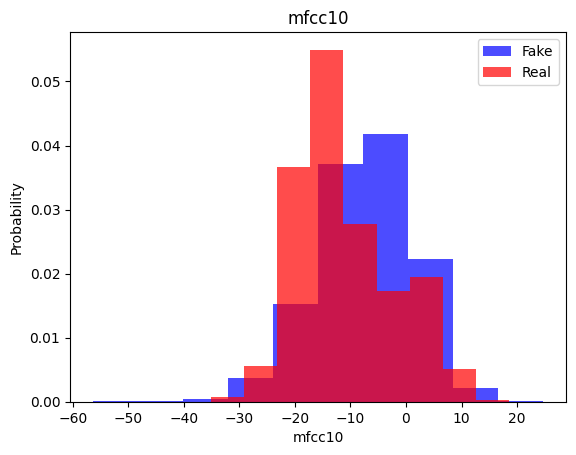

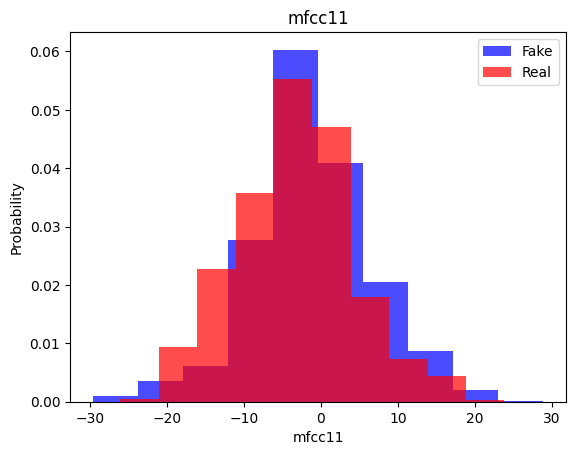

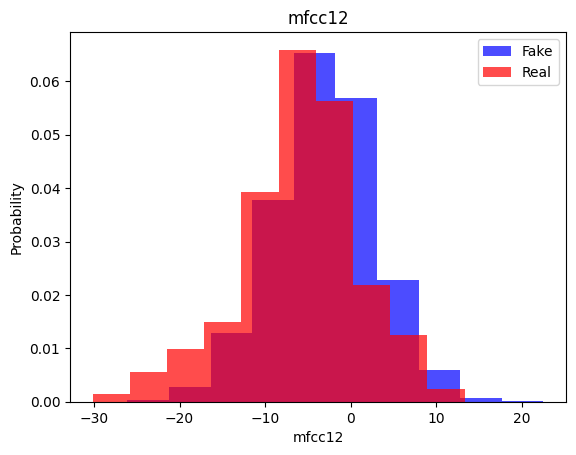

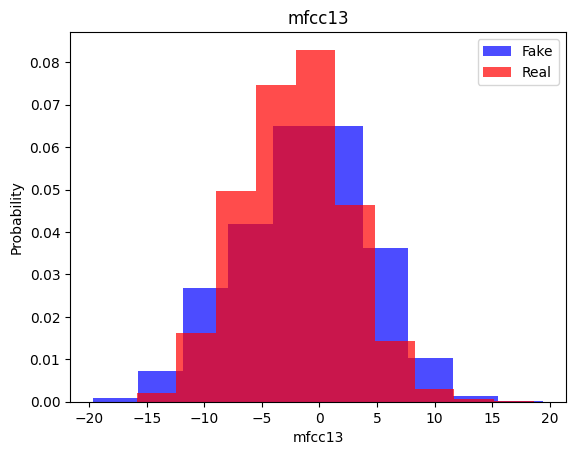

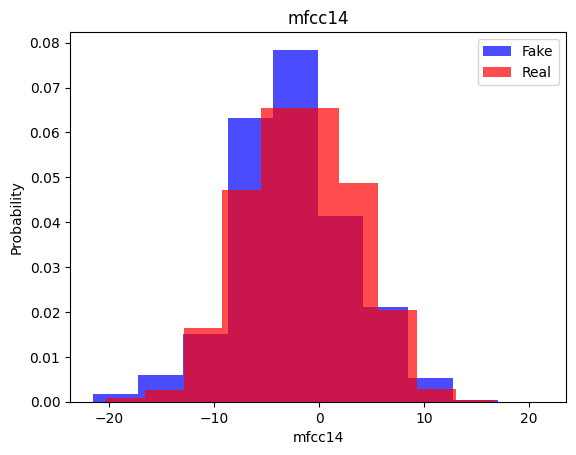

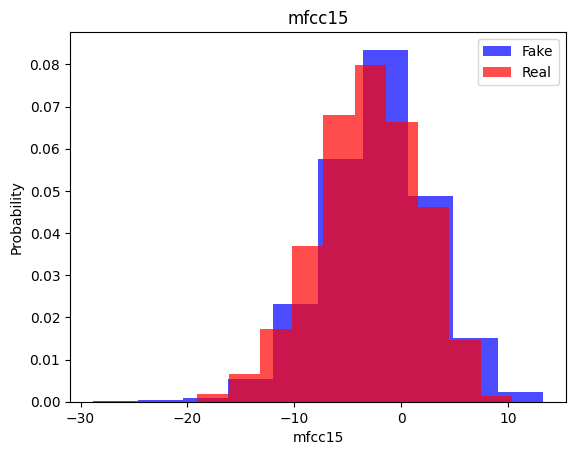

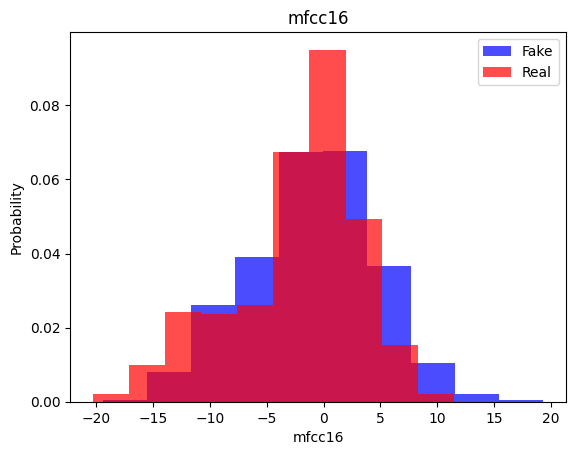

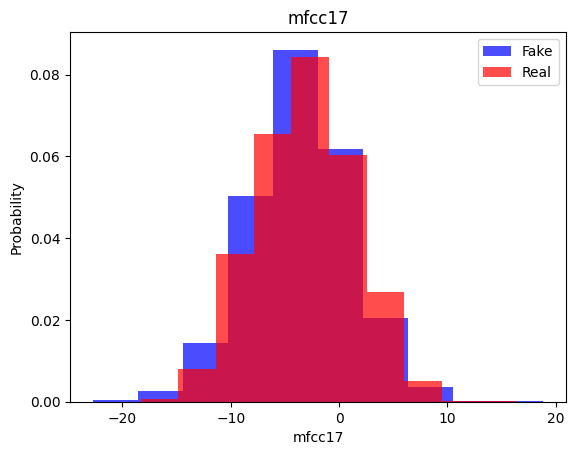

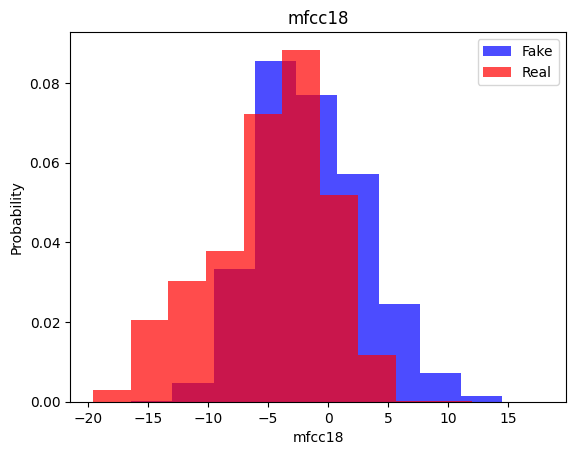

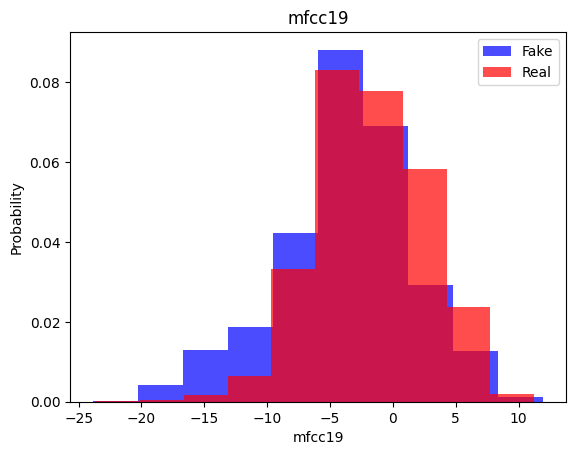

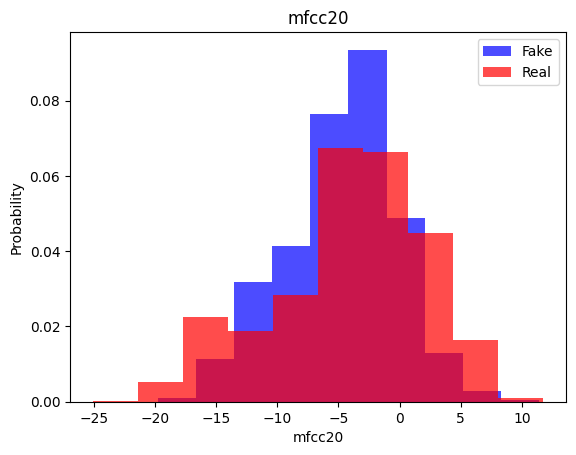

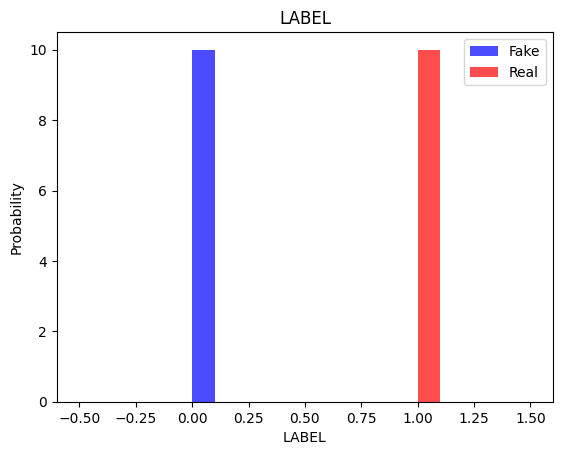

In [22]:
# data.head()
for label in data[:-1]:
  plt.hist(data[data['LABEL'] == 0][label], color = 'blue', alpha = 0.7, density = True, label = 'Fake')
  plt.hist(data[data['LABEL'] == 1][label], color = 'red', alpha = 0.7, density = True, label = 'Real')
  plt.title(label)
  plt.ylabel('Probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import numpy as np

In [26]:
def split_data(dataframe, oversample=False):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values


  data = np.hstack((x, np.reshape(y, (-1, 1))))

  return data, x, y

In [27]:
train, test = np.split(data.sample(frac=1, random_state=42), [int(len(data) * 0.8)])

train, xtrain, ytrain = split_data(train, oversample=False)
test, xtest, ytest = split_data(test, oversample=False)

/Users/jordan/Desktop/Live_Projects/Detecting_Deepfake_Audio/deepfake_venv/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [28]:
print(len(xtrain))
print(len(xtest))

9422
2356


In [30]:
knn_model = KNeighborsClassifier(n_neighbors=15)
knn_model.fit(xtrain, ytrain)

ypred = knn_model.predict(xtest)

print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79      1146
           1       0.82      0.76      0.79      1210

    accuracy                           0.79      2356
   macro avg       0.79      0.79      0.79      2356
weighted avg       0.79      0.79      0.79      2356



In [31]:
from sklearn.naive_bayes import GaussianNB

gaussian_model = GaussianNB()
gaussian_model.fit(xtrain, ytrain)

ypred = gaussian_model.predict(xtest)

print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1146
           1       0.87      0.79      0.83      1210

    accuracy                           0.83      2356
   macro avg       0.84      0.84      0.83      2356
weighted avg       0.84      0.83      0.83      2356



In [32]:
from sklearn.ensemble import RandomForestClassifier

randomforest_model = RandomForestClassifier()
randomforest_model.fit(xtrain, ytrain)

ypred = randomforest_model.predict(xtest)

print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1146
           1       0.99      0.98      0.99      1210

    accuracy                           0.98      2356
   macro avg       0.98      0.98      0.98      2356
weighted avg       0.98      0.98      0.98      2356



In [36]:
import xgboost as xgb

clf = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)
clf.fit(xtrain, ytrain)

ypred = clf.predict(xtest)

print(classification_report(ytest, ypred))

/Users/jordan/Desktop/Live_Projects/Detecting_Deepfake_Audio/deepfake_venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [15:05:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1146
           1       1.00      0.99      0.99      1210

    accuracy                           0.99      2356
   macro avg       0.99      0.99      0.99      2356
weighted avg       0.99      0.99      0.99      2356



In [37]:
data.head()

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,LABEL
0,0.338055,0.027948,2842.948867,4322.916759,6570.586186,0.041050,-462.169586,90.311272,19.073769,24.046888,...,-6.686564,0.902086,-7.251551,-1.198342,4.747403,-4.986279,0.953935,-5.013138,-6.779060,0
1,0.443766,0.037838,2336.129597,3445.777044,3764.949874,0.047730,-409.413422,120.348808,-7.161531,5.114784,...,-2.131157,-6.876417,-1.359395,0.326401,-5.420016,-2.109968,-1.757634,-9.537907,-8.494421,0
2,0.302528,0.056578,2692.988386,2861.133180,4716.610271,0.080342,-318.996033,120.490273,-24.625771,23.891073,...,-5.853725,-3.724773,-6.627182,-5.117002,-6.072106,-0.994653,-1.617120,-3.922354,-7.033001,0
3,0.319933,0.031504,2241.665382,3503.766175,3798.641521,0.047180,-404.636749,136.320908,2.308172,-3.907071,...,-1.898315,-2.046493,-7.176277,-3.293508,4.209121,0.121835,-5.407063,-3.654926,-3.274857,0
4,0.420055,0.016158,2526.069123,3102.659519,5025.077899,0.051905,-410.497925,152.731400,-18.266771,51.993462,...,-1.952340,0.810868,6.238493,6.555839,7.535542,2.849219,2.616843,-1.793357,-5.060998,0
